# Oversampling 6 Time Bellweathers SVM

### Links:  
Feature Importance: https://towardsdatascience.com/a-practical-guide-to-interpreting-and-visualising-support-vector-machines-97d2a5b0564e   
Visualisation: https://www.machinecurve.com/index.php/2020/05/05/how-to-visualize-support-vectors-of-your-svm-classifier/

### Import Libaries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statistics
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn import metrics

from sklearn.metrics import classification_report

### Import & Clean Dataset

In [3]:
pd.set_option('display.max_columns', None, 'display.max_rows', None)
pd.options.mode.chained_assignment = None

In [11]:
df = pd.read_csv('D:/MEGAN DATA/ASDRP/Fall2020/Bellwether Analysis/data/compiled_data/data_dropna.csv')
df = pd.read_csv('D:/MEGAN DATA/ASDRP/Fall2020/Bellwether Analysis/data/segmented_data/data_2004_2020.csv')

FileNotFoundError: [Errno 2] File D:/MEGAN DATA/ASDRP/Fall2020/Bellwether Analysis/data/segmented_data/data_2004_2020.csv does not exist: 'D:/MEGAN DATA/ASDRP/Fall2020/Bellwether Analysis/data/segmented_data/data_2004_2020.csv'

In [12]:
df.head()

Unnamed: 0  fips    state   county  wins  poverty_rate_1960  \
0           1  1003  Alabama  Baldwin     3               41.8   
1           2  1005  Alabama  Barbour     3               65.7   
2           3  1007  Alabama     Bibb     3               56.8   
3           4  1009  Alabama   Blount     3               45.6   
4           5  1011  Alabama  Bullock     3               72.2   

   poverty_rate_1970  poverty_rate_1980  poverty_rate_1990  poverty_rate_2000  \
0               22.6               16.2               14.3               10.1   
1               43.7               30.8               25.2               26.8   
2               38.2               21.2               21.2               20.6   
3               24.2               18.0               15.3               11.7   
4               54.9               35.4               36.5               33.5   

   poverty_rate_2010  population_1960  population_1970  population_1980  \
0               13.3          49722.0          58776.0          77726.0   
1               26.1          24975.0          22424.0          24533.0   
2               16.5          14775.0          13761.0          15520.0   
3               14.7          25414.0          26746.0          36244.0   
4               22.2          13402.0          11817.0          10565.0   

   population_1990  population_2000  population_2010  persons_in_poverty_1960  \
0          97227.0         138148.0           180970                  20773.0   
1          24785.0          26239.0            24530                  16395.0   
2          16304.0          19852.0            21794                   8386.0   
3          38924.0          50499.0            56993                  11595.0   
4          10340.0          10169.0            10313                   9680.0   

   persons_in_poverty_1970  persons_in_poverty_1980  persons_in_poverty_1990  \
0                  13304.0                  12616.0                  13947.0   
1                   9788.0                   7559.0                   6244.0   
2                   5256.0                   3296.0                   3454.0   
3                   6462.0                   6527.0                   5938.0   
4                   6492.0                   3745.0                   3776.0   

   persons_in_poverty_2000  persons_in_poverty_2010  \
0                  14018.0                    24002   
1                   7032.0                     6395   
2                   4091.0                     3594   
3                   5930.0                     8396   
4                   3405.0                     2286   

   rural_urban_continuum_code_2013  urban_influence_code_2013  metro_2013  \
0                              3.0                        2.0         1.0   
1                              6.0                        6.0         0.0   
2                              1.0                        1.0         1.0   
3                              1.0                        1.0         1.0   
4                              6.0                        6.0         0.0   

   civilian_labor_force_2000  civilian_labor_force_2001  \
0                      69533                      69161   
1                      11373                      11250   
2                       8565                       9081   
3                      25106                      25305   
4                       3971                       3912   

   civilian_labor_force_2002  civilian_labor_force_2003  \
0                      69169                      72299   
1                      10971                      10977   
2                       8933                       8836   
3                      25757                      25900   
4                       3877                       3979   

   civilian_labor_force_2004  civilian_labor_force_2005  \
0                      74772                    76804.0   
1                      10633                    10760.0   
2                  

In [13]:
df = df.drop(['Unnamed: 0'], axis=1)
len(df['wins'])

3021

In [14]:
# Add 2020 bellwether code (here we specify wins to 6)
# Specifying a bellwether to be either 5 or 6 wins would result in 59 bellweathers under the new classification
#  bellwether --> 1, non-bellwether --> 0

binary_bellweathers = []
for i, v in enumerate(df['wins']):
    if df.iloc[i, 3] == 5 or df.iloc[i, 3] == 6:
        binary_bellweathers.append(1)
    elif df.iloc[i, 3] < 5:
        binary_bellweathers.append(0)

In [15]:
binary_bellweathers.count(1)

134

In [16]:
# gets rid of irrelevant columns, strings, and wins (since that would give the model 100% accuracy)
df = df.drop(['fips', 'wins'], axis=1)
df = df.drop(['state', 'county'], axis=1)
df.head()

poverty_rate_1960  poverty_rate_1970  poverty_rate_1980  poverty_rate_1990  \
0               41.8               22.6               16.2               14.3   
1               65.7               43.7               30.8               25.2   
2               56.8               38.2               21.2               21.2   
3               45.6               24.2               18.0               15.3   
4               72.2               54.9               35.4               36.5   

   poverty_rate_2000  poverty_rate_2010  population_1960  population_1970  \
0               10.1               13.3          49722.0          58776.0   
1               26.8               26.1          24975.0          22424.0   
2               20.6               16.5          14775.0          13761.0   
3               11.7               14.7          25414.0          26746.0   
4               33.5               22.2          13402.0          11817.0   

   population_1980  population_1990  population_2000  population_2010  \
0          77726.0          97227.0         138148.0           180970   
1          24533.0          24785.0          26239.0            24530   
2          15520.0          16304.0          19852.0            21794   
3          36244.0          38924.0          50499.0            56993   
4          10565.0          10340.0          10169.0            10313   

   persons_in_poverty_1960  persons_in_poverty_1970  persons_in_poverty_1980  \
0                  20773.0                  13304.0                  12616.0   
1                  16395.0                   9788.0                   7559.0   
2                   8386.0                   5256.0                   3296.0   
3                  11595.0                   6462.0                   6527.0   
4                   9680.0                   6492.0                   3745.0   

   persons_in_poverty_1990  persons_in_poverty_2000  persons_in_poverty_2010  \
0                  13947.0                  14018.0                    24002   
1                   6244.0                   7032.0                     6395   
2                   3454.0                   4091.0                     3594   
3                   5938.0                   5930.0                     8396   
4                   3776.0                   3405.0                     2286   

   rural_urban_continuum_code_2013  urban_influence_code_2013  metro_2013  \
0                              3.0                        2.0         1.0   
1                              6.0                        6.0         0.0   
2                              1.0                        1.0         1.0   
3                              1.0                        1.0         1.0   
4                              6.0                        6.0         0.0   

   civilian_labor_force_2000  civilian_labor_force_2001  \
0                      69533                      69161   
1                      11373                      11250   
2                       8565                       9081   
3                      25106                      25305   
4                       3971                       3912   

   civilian_labor_force_2002  civilian_labor_force_2003  \
0                      69169                      72299   
1                      10971                      10977   
2                       8933                       8836   
3                      25757                      25900   
4                       3877                       3979   

   civilian_labor_force_2004  civilian_labor_force_2005  \
0                      74772                    76804.0   
1                      10633                    10760.0   
2                       8843                     8861.0   
3                      26208                    26446.0   
4                       3880                     3747.0   

   civilian_labor_force_2006  civilian_labor_force_2007  \
0                    79711.0                      82659   
1     

In [17]:
df.insert(0, "bellweather?", binary_bellweathers)

In [18]:
df.head()

bellweather?  poverty_rate_1960  poverty_rate_1970  poverty_rate_1980  \
0             0               41.8               22.6               16.2   
1             0               65.7               43.7               30.8   
2             0               56.8               38.2               21.2   
3             0               45.6               24.2               18.0   
4             0               72.2               54.9               35.4   

   poverty_rate_1990  poverty_rate_2000  poverty_rate_2010  population_1960  \
0               14.3               10.1               13.3          49722.0   
1               25.2               26.8               26.1          24975.0   
2               21.2               20.6               16.5          14775.0   
3               15.3               11.7               14.7          25414.0   
4               36.5               33.5               22.2          13402.0   

   population_1970  population_1980  population_1990  population_2000  \
0          58776.0          77726.0          97227.0         138148.0   
1          22424.0          24533.0          24785.0          26239.0   
2          13761.0          15520.0          16304.0          19852.0   
3          26746.0          36244.0          38924.0          50499.0   
4          11817.0          10565.0          10340.0          10169.0   

   population_2010  persons_in_poverty_1960  persons_in_poverty_1970  \
0           180970                  20773.0                  13304.0   
1            24530                  16395.0                   9788.0   
2            21794                   8386.0                   5256.0   
3            56993                  11595.0                   6462.0   
4            10313                   9680.0                   6492.0   

   persons_in_poverty_1980  persons_in_poverty_1990  persons_in_poverty_2000  \
0                  12616.0                  13947.0                  14018.0   
1                   7559.0                   6244.0                   7032.0   
2                   3296.0                   3454.0                   4091.0   
3                   6527.0                   5938.0                   5930.0   
4                   3745.0                   3776.0                   3405.0   

   persons_in_poverty_2010  rural_urban_continuum_code_2013  \
0                    24002                              3.0   
1                     6395                              6.0   
2                     3594                              1.0   
3                     8396                              1.0   
4                     2286                              6.0   

   urban_influence_code_2013  metro_2013  civilian_labor_force_2000  \
0                        2.0         1.0                      69533   
1                        6.0         0.0                      11373   
2                        1.0         1.0                       8565   
3                        1.0         1.0                      25106   
4                        6.0         0.0                       3971   

   civilian_labor_force_2001  civilian_labor_force_2002  \
0                      69161                      69169   
1                      11250                      10971   
2                       9081                       8933   
3                      25305                      25757   
4                       3912                       3877   

   civilian_labor_force_2003  civilian_labor_force_2004  \
0                      72299                      74772   
1                      10977                      10633   
2                       8836                       8843   
3                      25900                      26208   
4                       3979                       3880   

   civilian_labor_force_2005  civilian_labor_force_2006  \
0                    76804.0                    79711.0   
1                    10760.0                    10705.0   
2                     886

In [19]:
df["bellweather?"].value_counts()

0    2887
1     134
Name: bellweather?, dtype: int64

In [20]:
# only take the 59 bellweathers

df1 = df[df["bellweather?"] == 1]

In [21]:
df1.head()

bellweather?  poverty_rate_1960  poverty_rate_1970  poverty_rate_1980  \
35              1               30.9               18.8               15.3   
150             1               19.2               17.3               15.0   
155             1               23.9               18.9               14.5   
169             1               26.6               16.9               14.7   
178             1               18.9               13.6               11.3   

     poverty_rate_1990  poverty_rate_2000  poverty_rate_2010  population_1960  \
35                16.0               14.8               17.0         629388.0   
150               18.9               19.8               20.6          81697.0   
155               21.4               22.9               24.8         359747.0   
169               19.9               21.7               24.6          88519.0   
178               11.5               14.2               15.6         296785.0   

     population_1970  population_1980  population_1990  population_2000  \
35          638855.0         662694.0         639105.0         647628.0   
150          98621.0         139812.0         177265.0         197816.0   
155         406634.0         505449.0         655133.0         782294.0   
169         102008.0         132323.0         174957.0         208052.0   
178         447712.0         651793.0        1143985.0        1511153.0   

     population_2010  persons_in_poverty_1960  persons_in_poverty_1970  \
35            645062                 194321.0                 119976.0   
150           214624                  15660.0                  17020.0   
155           913669                  86089.0                  76887.0   
169           252170                  23564.0                  17248.0   
178          2157713                  56074.0                  60680.0   

     persons_in_poverty_1980  persons_in_poverty_1990  \
35                  101520.0                 102276.0   
150                  20953.0                  33453.0   
155                  73283.0                 140447.0   
169                  19442.0                  34813.0   
178                  73394.0                 131690.0   

     persons_in_poverty_2000  persons_in_poverty_2010  \
35                   95674.0                   109935   
150                  39148.0                    44156   
155                 179085.0                   226967   
169                  45059.0                    61914   
178                 214084.0                   335557   

     rural_urban_continuum_code_2013  urban_influence_code_2013  metro_2013  \
35                               1.0                        1.0         1.0   
150                              3.0                        2.0         1.0   
155                              2.0                        2.0         1.0   
169                              2.0                        2.0         1.0   
178                              1.0                        1.0         1.0   

     civilian_labor_force_2000  civilian_labor_force_2001  \
35                      329015                     325883   
150                      93228                      95129   
155                     388673                     389457   
169                      90390                      91744   
178                     681290                     710475   

     civilian_labor_force_2002  civilian_labor_force_2003  \
35                      322122                     321042   
150                      97097                      98296   
155                     401121                     403733   
169                      95700                      96839   
178                     746343                     775966   

     civilian_labor_force_2004  civilian_labor_force_2005  \
35                      320336                   317359.0   
150                      97434                    98309.0   
155                     404288                   407163.0   
169           

In [22]:
# increasing the number of bellweathers up to 1287, to give the dataset a roughly 30 - 70 split

df1_repeated = pd.concat([df1]*22, ignore_index=True)

In [23]:
df1_repeated.head()

bellweather?  poverty_rate_1960  poverty_rate_1970  poverty_rate_1980  \
0             1               30.9               18.8               15.3   
1             1               19.2               17.3               15.0   
2             1               23.9               18.9               14.5   
3             1               26.6               16.9               14.7   
4             1               18.9               13.6               11.3   

   poverty_rate_1990  poverty_rate_2000  poverty_rate_2010  population_1960  \
0               16.0               14.8               17.0         629388.0   
1               18.9               19.8               20.6          81697.0   
2               21.4               22.9               24.8         359747.0   
3               19.9               21.7               24.6          88519.0   
4               11.5               14.2               15.6         296785.0   

   population_1970  population_1980  population_1990  population_2000  \
0         638855.0         662694.0         639105.0         647628.0   
1          98621.0         139812.0         177265.0         197816.0   
2         406634.0         505449.0         655133.0         782294.0   
3         102008.0         132323.0         174957.0         208052.0   
4         447712.0         651793.0        1143985.0        1511153.0   

   population_2010  persons_in_poverty_1960  persons_in_poverty_1970  \
0           645062                 194321.0                 119976.0   
1           214624                  15660.0                  17020.0   
2           913669                  86089.0                  76887.0   
3           252170                  23564.0                  17248.0   
4          2157713                  56074.0                  60680.0   

   persons_in_poverty_1980  persons_in_poverty_1990  persons_in_poverty_2000  \
0                 101520.0                 102276.0                  95674.0   
1                  20953.0                  33453.0                  39148.0   
2                  73283.0                 140447.0                 179085.0   
3                  19442.0                  34813.0                  45059.0   
4                  73394.0                 131690.0                 214084.0   

   persons_in_poverty_2010  rural_urban_continuum_code_2013  \
0                   109935                              1.0   
1                    44156                              3.0   
2                   226967                              2.0   
3                    61914                              2.0   
4                   335557                              1.0   

   urban_influence_code_2013  metro_2013  civilian_labor_force_2000  \
0                        1.0         1.0                     329015   
1                        2.0         1.0                      93228   
2                        2.0         1.0                     388673   
3                        2.0         1.0                      90390   
4                        1.0         1.0                     681290   

   civilian_labor_force_2001  civilian_labor_force_2002  \
0                     325883                     322122   
1                      95129                      97097   
2                     389457                     401121   
3                      91744                      95700   
4                     710475                     746343   

   civilian_labor_force_2003  civilian_labor_force_2004  \
0                     321042                     320336   
1                      98296                      97434   
2                     403733                     404288   
3                      96839                      97625   
4                     775966                     817683   

   civilian_labor_force_2005  civilian_labor_force_2006  \
0                   317359.0                   316750.0   
1                    98309.0                    99752.0   
2                   40716

In [24]:
# take all of the non-bellweathers and store them in df2

df2 = df[df["bellweather?"] == 0]

In [25]:
df2["bellweather?"].value_counts()

0    2887
Name: bellweather?, dtype: int64

In [26]:
df_new = df1_repeated.append(df2)

In [27]:
df_new["bellweather?"].value_counts()

1    2948
0    2887
Name: bellweather?, dtype: int64

In [28]:
len(df_new)

5835

In [29]:
# store all features except wins in x_new
# store wins in y_new

x_new = df_new.loc[:, df_new.columns != 'bellweather?']
y_new = df_new["bellweather?"]

In [30]:
x_new.head()

poverty_rate_1960  poverty_rate_1970  poverty_rate_1980  poverty_rate_1990  \
0               30.9               18.8               15.3               16.0   
1               19.2               17.3               15.0               18.9   
2               23.9               18.9               14.5               21.4   
3               26.6               16.9               14.7               19.9   
4               18.9               13.6               11.3               11.5   

   poverty_rate_2000  poverty_rate_2010  population_1960  population_1970  \
0               14.8               17.0         629388.0         638855.0   
1               19.8               20.6          81697.0          98621.0   
2               22.9               24.8         359747.0         406634.0   
3               21.7               24.6          88519.0         102008.0   
4               14.2               15.6         296785.0         447712.0   

   population_1980  population_1990  population_2000  population_2010  \
0         662694.0         639105.0         647628.0           645062   
1         139812.0         177265.0         197816.0           214624   
2         505449.0         655133.0         782294.0           913669   
3         132323.0         174957.0         208052.0           252170   
4         651793.0        1143985.0        1511153.0          2157713   

   persons_in_poverty_1960  persons_in_poverty_1970  persons_in_poverty_1980  \
0                 194321.0                 119976.0                 101520.0   
1                  15660.0                  17020.0                  20953.0   
2                  86089.0                  76887.0                  73283.0   
3                  23564.0                  17248.0                  19442.0   
4                  56074.0                  60680.0                  73394.0   

   persons_in_poverty_1990  persons_in_poverty_2000  persons_in_poverty_2010  \
0                 102276.0                  95674.0                   109935   
1                  33453.0                  39148.0                    44156   
2                 140447.0                 179085.0                   226967   
3                  34813.0                  45059.0                    61914   
4                 131690.0                 214084.0                   335557   

   rural_urban_continuum_code_2013  urban_influence_code_2013  metro_2013  \
0                              1.0                        1.0         1.0   
1                              3.0                        2.0         1.0   
2                              2.0                        2.0         1.0   
3                              2.0                        2.0         1.0   
4                              1.0                        1.0         1.0   

   civilian_labor_force_2000  civilian_labor_force_2001  \
0                     329015                     325883   
1                      93228                      95129   
2                     388673                     389457   
3                      90390                      91744   
4                     681290                     710475   

   civilian_labor_force_2002  civilian_labor_force_2003  \
0                     322122                     321042   
1                      97097                      98296   
2                     401121                     403733   
3                      95700                      96839   
4                     746343                     775966   

   civilian_labor_force_2004  civilian_labor_force_2005  \
0                     320336                   317359.0   
1                      97434                    98309.0   
2                     404288                   407163.0   
3                      97625                    98738.0   
4                     817683                   852578.0   

   civilian_labor_force_2006  civilian_labor_force_2007  \
0                   316750.0                     314739   
1     

In [31]:
# approx 30% bellwethers and 70% non bellwethers
y_new.value_counts()

1    2948
0    2887
Name: bellweather?, dtype: int64

### Define Functions

In [32]:
def run_multiple_times(num_runs, c_value):
    x_train_average = {}
    x_test_average = {}
    y_train_average = {}
    y_test_average = {}
    classifier_average = {}
    y_pred_average = {}
    accuracy_list=[]
    sum = 0

    for x in range(num_runs):
        # split each sample into 75% training and 25% testing
        x_train_average[x], x_test_average[x], y_train_average[x], y_test_average[x] = \
            train_test_split(x_new, y_new, test_size=0.25)

        classifier_average[x] = SVC(kernel='rbf', C=c_value)

        classifier_average[x].fit(x_train_average[x], y_train_average[x])

        x_temp = x_new

        y_pred_average[x] = classifier_average[x].predict(x_test_average[x])
        (y_test_average[x] - y_pred_average[x]).map(lambda x_temp: x_temp*x_temp).sum()
        y = metrics.accuracy_score(y_test_average[x], y_pred_average[x])
        accuracy_list.append(y)

    # print average accuracy and standard deviation
    print("Average Accuracy: {0}".format(statistics.mean(accuracy_list)))
    print("Standard Deviation: {0}".format(statistics.stdev(accuracy_list)))

In [33]:
def svm_accuracy(clf):
    y_pred_class = clf.predict(x_train_new)
    training_accuracy = metrics.accuracy_score(y_train_new, y_pred_class)
    training_error = 1 - training_accuracy
    print("SVM Training set accuracy: {0}, Training set error: {1}".format(training_accuracy, training_error))
    y_pred_class = clf.predict(x_test_new)
    testing_accuracy = metrics.accuracy_score(y_test_new, y_pred_class)
    testing_error = 1 - testing_accuracy
    print("SVM Test accuracy: {0}, Test error: {1} \n".format(testing_accuracy, testing_error))

In [34]:
def svm_report(clf):
    print("CLassification Report")
    y_pred_new = clf.predict(x_test_new)
    print(classification_report(y_test_new, y_pred_new))

### Using SVC 
https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html

In [35]:
# split data
x_train_new, x_test_new, y_train_new, y_test_new = \
    train_test_split(x_new, y_new, test_size=0.25)

np.unique(y_new)

array([0, 1], dtype=int64)

In [36]:
# fit model (default parameters)
svclassifier = SVC(kernel='rbf')
svclassifier.fit(x_train_new, y_train_new)

SVC()

In [37]:
svm_accuracy(svclassifier)

SVM Training set accuracy: 0.6551645338208409, Training set error: 0.34483546617915906
SVM Test accuracy: 0.6614119259766964, Test error: 0.3385880740233036 



In [38]:
svm_report(svclassifier)

CLassification Report
              precision    recall  f1-score   support

           0       0.61      0.85      0.71       701
           1       0.78      0.49      0.60       758

    accuracy                           0.66      1459
   macro avg       0.69      0.67      0.65      1459
weighted avg       0.69      0.66      0.65      1459



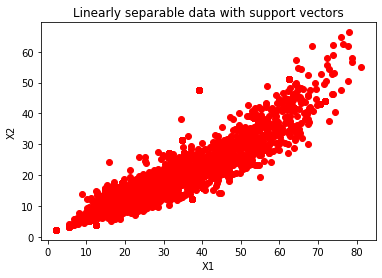

In [39]:
# https://www.machinecurve.com/index.php/2020/05/05/how-to-visualize-support-vectors-of-your-svm-classifier/

support_vectors = svclassifier.support_vectors_
support_vectors

# Visualize support vectors
# plt.scatter(x_train_new[:,0], x_train_new[:,1])
plt.scatter(support_vectors[:,0], support_vectors[:,1], color='red')
plt.title('Linearly separable data with support vectors')
plt.xlabel('X1')
plt.ylabel('X2')
plt.show()

### Run SVC Classifier 30 times

In [40]:
run_multiple_times(30, 1) #default c value

Average Accuracy: 0.6541695225039982
Standard Deviation: 0.012323663748242042


### C value tuning

In [41]:
cs = [0.1, 1, 10, 100, 1000, 10000]
for c in cs:
    svclassifier = SVC(kernel='rbf', C=c)
    svclassifier.fit(x_train_new, y_train_new)
    print("C value of " + str(c))
    svm_accuracy(svclassifier)
    svm_report(svclassifier)

C value of 0.1
SVM Training set accuracy: 0.6425959780621572, Training set error: 0.3574040219378428
SVM Test accuracy: 0.6387936943111721, Test error: 0.36120630568882794 

CLassification Report
              precision    recall  f1-score   support

           0       0.58      0.86      0.70       701
           1       0.77      0.43      0.56       758

    accuracy                           0.64      1459
   macro avg       0.68      0.65      0.63      1459
weighted avg       0.68      0.64      0.62      1459

C value of 1
SVM Training set accuracy: 0.6551645338208409, Training set error: 0.34483546617915906
SVM Test accuracy: 0.6614119259766964, Test error: 0.3385880740233036 

CLassification Report
              precision    recall  f1-score   support

           0       0.61      0.85      0.71       701
           1       0.78      0.49      0.60       758

    accuracy                           0.66      1459
   macro avg       0.69      0.67      0.65      1459
weighted av

#### Optimal value for C
C value of 100000  
SVM Training set accuracy: 0.8771763216207661, Training set error: 0.12282367837923391  
SVM Test accuracy: 0.8766603415559773, Test error: 0.12333965844402273 

#### Results with more c-values (takes a long time to run)
C value of 0.1  
SVM Training set accuracy: 0.6929408040519152, Training set error: 0.30705919594808484  
SVM Test accuracy: 0.7058823529411765, Test error: 0.2941176470588235 

C value of 1  
SVM Training set accuracy: 0.7059195948084837, Training set error: 0.29408040519151635  
SVM Test accuracy: 0.7201138519924098, Test error: 0.27988614800759015 

C value of 10  
SVM Training set accuracy: 0.7176321620766065, Training set error: 0.2823678379233935  
SVM Test accuracy: 0.7267552182163188, Test error: 0.27324478178368117 

C value of 100  
SVM Training set accuracy: 0.7318771763216207, Training set error: 0.26812282367837925  
SVM Test accuracy: 0.7381404174573055, Test error: 0.2618595825426945 

C value of 1000  
SVM Training set accuracy: 0.7932890155112378, Training set error: 0.20671098448876224  
SVM Test accuracy: 0.7979127134724858, Test error: 0.20208728652751418 

C value of 10000  
SVM Training set accuracy: 0.8420386198163976, Training set error: 0.1579613801836024  
SVM Test accuracy: 0.8415559772296015, Test error: 0.15844402277039848 

C value of 100000  
SVM Training set accuracy: 0.8771763216207661, Training set error: 0.12282367837923391  
SVM Test accuracy: 0.8766603415559773, Test error: 0.12333965844402273 

C value of 1000000  
SVM Training set accuracy: 0.862298195631529, Training set error: 0.13770180436847101  
SVM Test accuracy: 0.8434535104364327, Test error: 0.15654648956356731 

C value of 10000000  
SVM Training set accuracy: 0.8208293763849319, Training set error: 0.17917062361506808  
SVM Test accuracy: 0.7941176470588235, Test error: 0.20588235294117652 

In [42]:
cs = [10000, 20000, 50000, 100000, 150000]
for c in cs:
    svclassifier = SVC(kernel='rbf', C=c)
    svclassifier.fit(x_train_new, y_train_new)
    print("C value of " + str(c))
    svm_accuracy(svclassifier)
    svm_report(svclassifier)

C value of 10000
SVM Training set accuracy: 0.798217550274223, Training set error: 0.20178244972577697
SVM Test accuracy: 0.7895819054146676, Test error: 0.21041809458533245 

CLassification Report
              precision    recall  f1-score   support

           0       0.74      0.87      0.80       701
           1       0.86      0.71      0.78       758

    accuracy                           0.79      1459
   macro avg       0.80      0.79      0.79      1459
weighted avg       0.80      0.79      0.79      1459

C value of 20000
SVM Training set accuracy: 0.8002742230347349, Training set error: 0.19972577696526506
SVM Test accuracy: 0.7991775188485264, Test error: 0.2008224811514736 

CLassification Report
              precision    recall  f1-score   support

           0       0.74      0.89      0.81       701
           1       0.88      0.72      0.79       758

    accuracy                           0.80      1459
   macro avg       0.81      0.80      0.80      1459
weigh